In [1]:

from SimuBox import Landscaper, VoronoiCell, Scatter
from SimuBox import read_density, read_printout, parse_density, iso2D, iso1D, iso0D, check_filepath
from SimuBox import TopoCreater, fA, x
from SimuBox import WeightedMode, VoronoiCell
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
from pathlib import Path

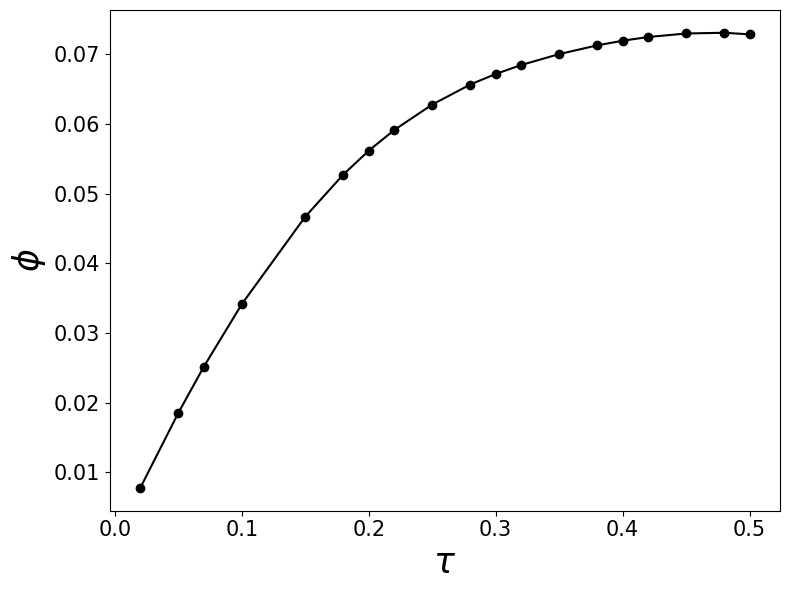

Iso0DPlot(fig=<Figure size 800x600 with 1 Axes>, ax=<Axes: xlabel='$\\tau$', ylabel='$\\phi$'>, data=array([[0.02      , 0.0077328 ],
       [0.05      , 0.01850404],
       [0.07      , 0.02511484],
       [0.1       , 0.03412152],
       [0.15      , 0.04667638],
       [0.18      , 0.05273516],
       [0.2       , 0.05615063],
       [0.22      , 0.05910839],
       [0.25      , 0.06277321],
       [0.28      , 0.06565468],
       [0.3       , 0.06716561],
       [0.32      , 0.06844753],
       [0.35      , 0.0700201 ],
       [0.38      , 0.07127623],
       [0.4       , 0.07194031],
       [0.42      , 0.07246986],
       [0.45      , 0.07298104],
       [0.48      , 0.07308487],
       [0.5       , 0.07285473]]))

In [5]:
path = Path(r"C:\Users\Alkaid\Desktop\fA=0.30,XN=30")
folders = list(path.iterdir())
iso0D(paths=folders, labels="tau", filename="block.bin", point=[0,0.6])

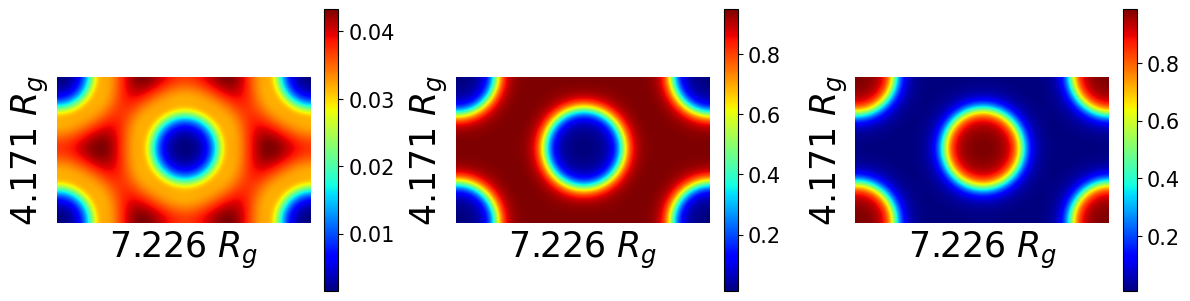

(<Figure size 1200x350 with 6 Axes>,
 array([<Axes: xlabel='7.226 $R_g$', ylabel='4.171 $R_g$'>,
        <Axes: xlabel='7.226 $R_g$', ylabel='4.171 $R_g$'>,
        <Axes: xlabel='7.226 $R_g$', ylabel='4.171 $R_g$'>], dtype=object))

In [16]:
path = check_filepath("./datasets/density/bin_block", filename="block.txt", )
des = read_density(path)
iso2D(des, target="all", rotation=1, expand=1, colorbar=True)

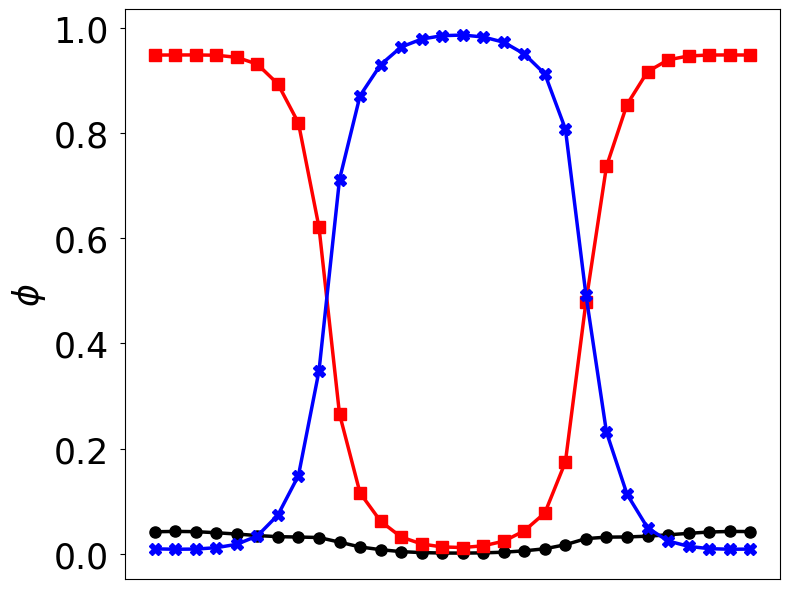

In [8]:
path = check_filepath("./datasets/density/bin_block", filename="block.txt", )
des = read_density(path)
p_des = parse_density(des)
iso1D(des, target="all", direction="diag", coord=[0.3,0,0.7,1],xticks=False)

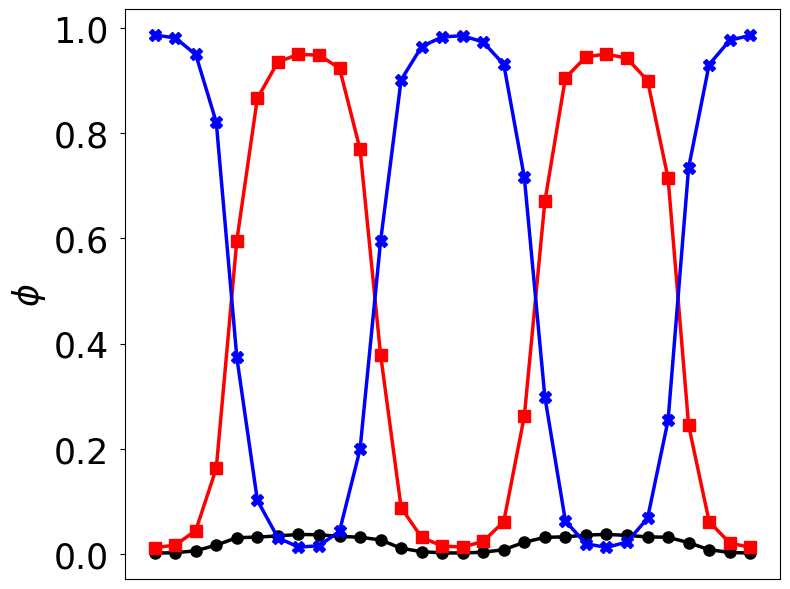

In [17]:
path = check_filepath("./datasets/density/bin_block", filename="block.txt", )
des = read_density(path)
iso1D(des, target="all", direction="diag", xticks=False)

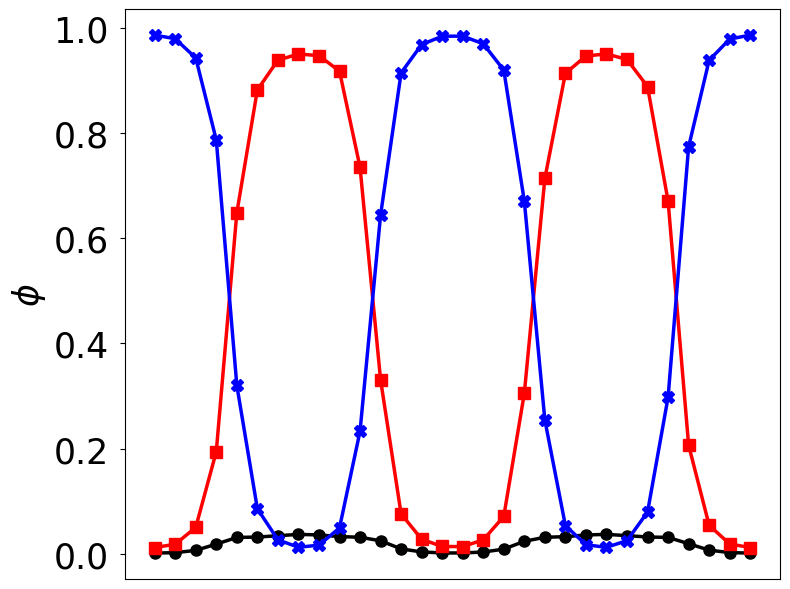

In [3]:
path = check_filepath("./datasets/density/bin_block", filename="block.txt", )
des = read_density(path)
iso1D(des, target="all", direction="back-diag", xticks=False)

## 拓扑结构

Using fraction as scaler.


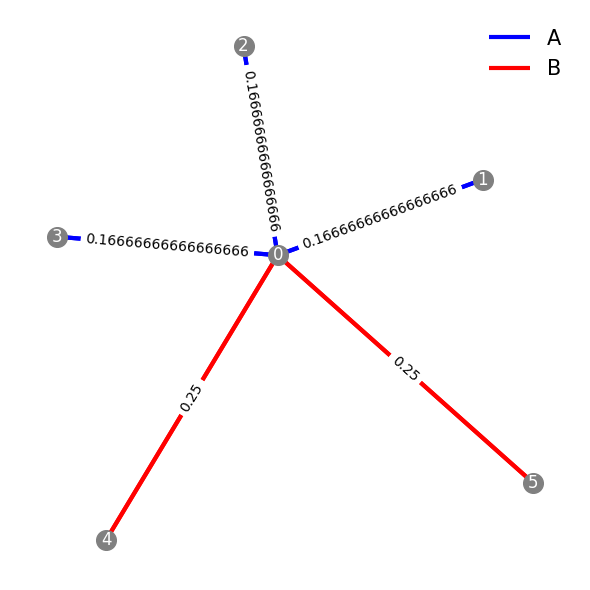

TopoPlot(fig=<Figure size 600x600 with 1 Axes>, ax=<Axes: >, kind_color={'A': 'b', 'B': 'r'}, rad=0.4)

In [3]:
tc = TopoCreater(verbose=False)
tc.AmBn("AAABB",fractions=[1/6]*3+ [1/4]*2, verbose=False, ignore=False)
tc.show_topo(colorlist=['b','r'])

In [4]:
tc.edges(data=True)

OutEdgeDataView([(0, 1, {'fraction': 0.16666666666666666, 'name': 'A_1', 'kind': 'A'}), (0, 2, {'fraction': 0.16666666666666666, 'name': 'A_2', 'kind': 'A'}), (0, 3, {'fraction': 0.16666666666666666, 'name': 'A_3', 'kind': 'A'}), (0, 4, {'fraction': 0.25, 'name': 'B_4', 'kind': 'B'}), (0, 5, {'fraction': 0.25, 'name': 'B_5', 'kind': 'B'}), (1, 0, {'fraction': 0.16666666666666666, 'name': 'A_1', 'kind': 'A'}), (2, 0, {'fraction': 0.16666666666666666, 'name': 'A_2', 'kind': 'A'}), (3, 0, {'fraction': 0.16666666666666666, 'name': 'A_3', 'kind': 'A'}), (4, 0, {'fraction': 0.25, 'name': 'B_4', 'kind': 'B'}), (5, 0, {'fraction': 0.25, 'name': 'B_5', 'kind': 'B'})])

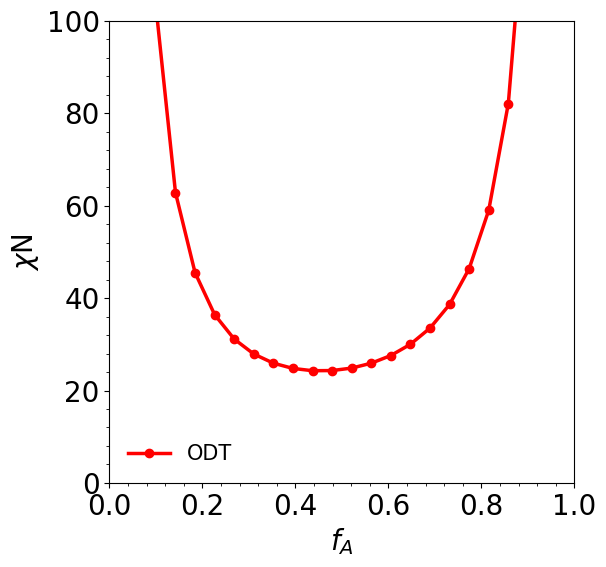

In [5]:
tc.RPA()
res = tc.ODT(fs=np.linspace(0.1, 0.9, 20), plot=True)

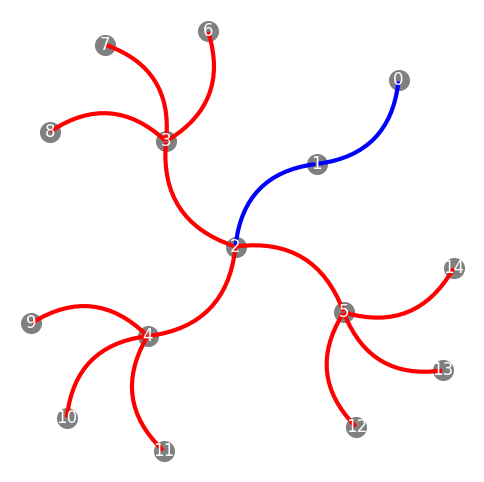

TopoShow(fig=<Figure size 600x600 with 1 Axes>, ax=<Axes: >, kind_color={'A': 'b', 'B': 'r'}, rad=0.4)

In [6]:
tc = TopoCreater()
tc.dendrimer(A_block_layer=2, B_block_layer=2, A_branch=1, B_branch=3)
tc.show_topo(colorlist=['b','r'], curve=True, show_edge_labels=False)

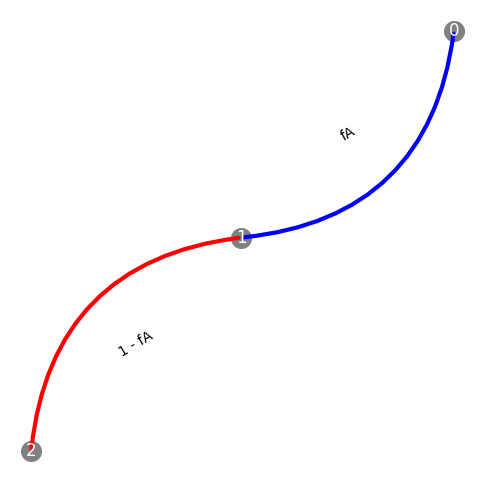

In [7]:
tc = TopoCreater(verbose=False)
tc.linear("AB", fractions=[fA, 1-fA])
tc.show_topo(colorlist=['b','r'], curve=True)
tc.RPA()
# res = tc.ODT(fs=np.linspace(0.1, 0.9, 20))


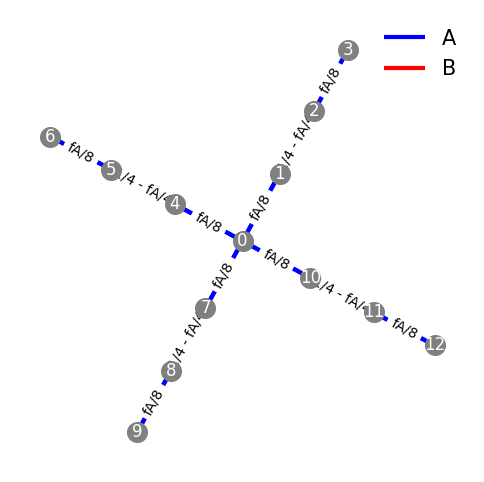

TopoShow(fig=<Figure size 600x600 with 1 Axes>, ax=<Axes: >, kind_color={'A': 'b', 'B': 'r'}, rad=0.4)

In [8]:
tc = TopoCreater()
tc.star("ABA", arm=4, verbose=False, fractions=[(fA/2)/4, (1-fA)/4, (fA/2)/4])
tc.show_topo(colorlist=['b','r'])

## 散射图

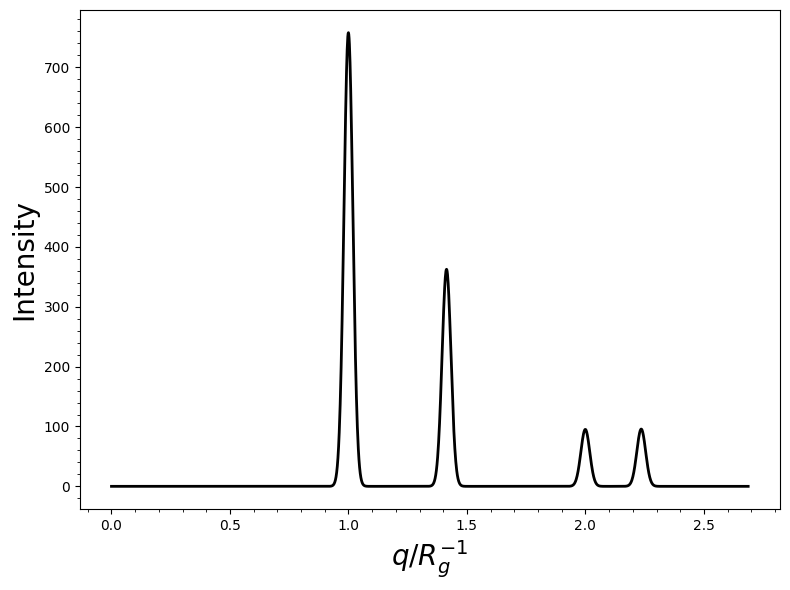

In [4]:

path = "./Datasets/Scatter/phout_C4.txt"
des = read_density(path)
sc = Scatter.sacttering_peak(density=des, target=0)
sc_plots = Scatter.show_peak(res=sc, cutoff=300)

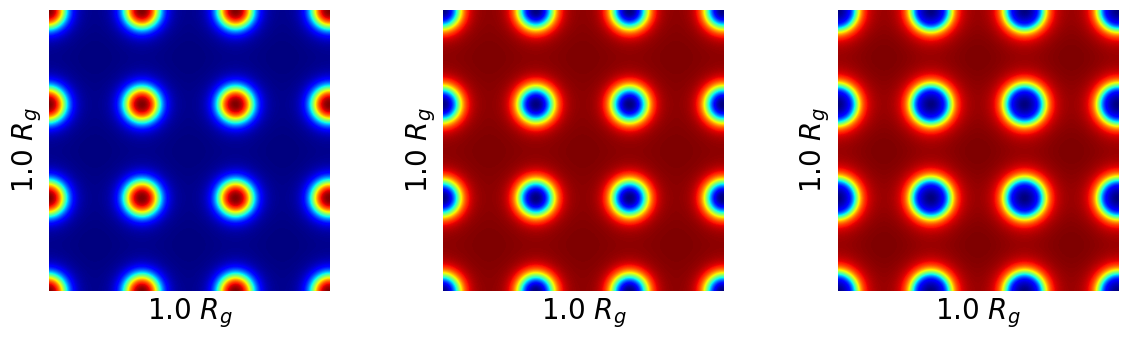

In [5]:
iso_plots = iso2D(des, target=[0,1,2])

## 密度解析

In [1]:
from SimuBox import read_json, read_density
import numpy as np
des = read_density("./Datasets/Desity/Block/BAB5_C4_block.txt")
inputs = read_json("./Datasets/Desity/Block/input_star.json")
des.repair_data(inputs)
des.data

,0,1,2
0,0.042323,0.933224,0.024453
1,0.043432,0.931347,0.025221
2,0.046845,0.925538,0.027617
3,0.052811,0.915255,0.031934
4,0.061742,0.899565,0.038693
...,...,...,...
4091,0.075455,0.874620,0.049925
4092,0.062979,0.897259,0.039762
4093,0.053996,0.913140,0.032865
4094,0.047988,0.923557,0.028454


In [2]:
des = read_density("./Datasets/Desity/Block/BAB5_C4_block.txt")
data = des.data.copy()
data = data.div(data.sum(axis=0)) * 64 * 64 * np.array([0.03, 0.12, 0.05]) * 5
data = data.div(data.sum(axis=1), axis=0)
data

,0,1,2
0,0.042323,0.933224,0.024453
1,0.043432,0.931347,0.025221
2,0.046845,0.925538,0.027617
3,0.052811,0.915255,0.031934
4,0.061742,0.899565,0.038693
...,...,...,...
4091,0.075455,0.874620,0.049925
4092,0.062979,0.897259,0.039762
4093,0.053996,0.913140,0.032865
4094,0.047988,0.923557,0.028454


In [3]:
des = read_density(r"D:\MyPrj\WeiHuaLi\C4_stability\Phout_View\G\block_tops.bin")
data = des.data.copy()
data = data.div(data.sum(axis=0)) * 128 **3 * np.array([0.110571,0.07,0.086,0.07,0.663429])
data["sum"] = data.sum(axis=1)
data

,0,1,2,3,4,sum
0,0.145100,0.022164,0.063831,0.024462,0.744443,1.0
1,0.150621,0.023651,0.070091,0.025979,0.729659,1.0
2,0.156013,0.025285,0.076765,0.027639,0.714298,1.0
3,0.161233,0.027078,0.083832,0.029454,0.698403,1.0
4,0.166239,0.029043,0.091259,0.031437,0.682022,1.0
...,...,...,...,...,...,...
2097147,0.106889,0.014994,0.032443,0.017058,0.828615,1.0
2097148,0.112138,0.015757,0.035771,0.017857,0.818476,1.0
2097149,0.117495,0.016592,0.039446,0.018726,0.807741,1.0
2097150,0.122932,0.017505,0.043485,0.019673,0.796405,1.0


In [4]:
des = read_density(r"D:\MyPrj\WeiHuaLi\C4_stability\Phout_View\G\block_tops.bin")
data = des.data.copy()
des.repair_data(inputs=np.array([0.110571,0.07,0.086,0.07,0.663429]))
data = des.data.copy()
data["sum"] = data.sum(axis=1)
data

,0,1,2,3,4,sum
0,0.145100,0.022164,0.063831,0.024462,0.744443,1.0
1,0.150621,0.023651,0.070091,0.025979,0.729659,1.0
2,0.156013,0.025285,0.076765,0.027639,0.714298,1.0
3,0.161233,0.027078,0.083832,0.029454,0.698403,1.0
4,0.166239,0.029043,0.091259,0.031437,0.682022,1.0
...,...,...,...,...,...,...
2097147,0.106889,0.014994,0.032443,0.017058,0.828615,1.0
2097148,0.112138,0.015757,0.035771,0.017857,0.818476,1.0
2097149,0.117495,0.016592,0.039446,0.018726,0.807741,1.0
2097150,0.122932,0.017505,0.043485,0.019673,0.796405,1.0


In [6]:
des = read_density(r"D:\MyPrj\WeiHuaLi\C4_stability\Phout_View\G\block_tops.bin")
des.repair_data("auto")
des.data

,0,1,2,3,4
0,0.145101,0.022186,0.063832,0.024437,0.744444
1,0.150622,0.023674,0.070092,0.025952,0.729660
2,0.156014,0.025309,0.076766,0.027611,0.714299
3,0.161234,0.027104,0.083833,0.029425,0.698404
4,0.166241,0.029071,0.091260,0.031405,0.682023
...,...,...,...,...,...
2097147,0.106890,0.015009,0.032443,0.017041,0.828617
2097148,0.112139,0.015773,0.035772,0.017839,0.818478
2097149,0.117496,0.016608,0.039447,0.018707,0.807742
2097150,0.122933,0.017522,0.043486,0.019653,0.796406


## 自由能景观图

极小值点: ly: 2.051041, lz:2.051041, freeE: 11.68579359
Free energy mat shape: (121, 121)
level:  0.001 面积： 0.06137515892651197 周长： 1.3302406387698007 IQ:  0.4358550386775006
level:  0.01 面积： 0.4122518259705505 周长： 2.8725683649276608 IQ:  0.6278150251630036
Save to: Datasets\landscape.png


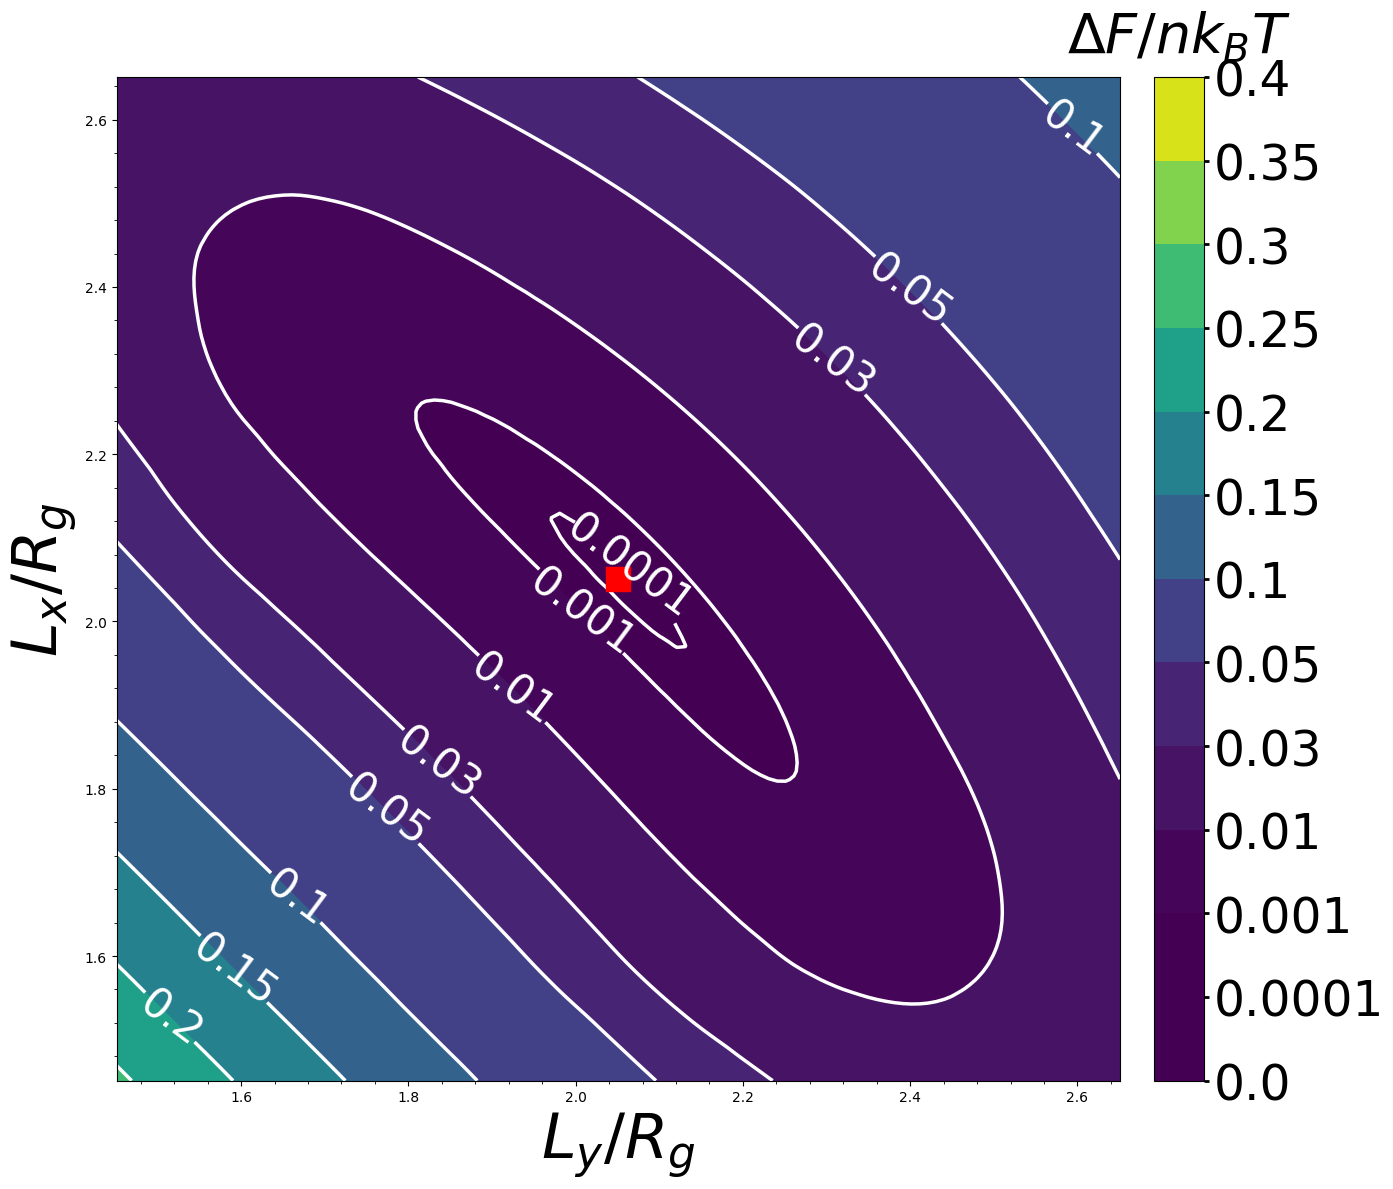

In [11]:
land = Landscaper(path='./Datasets/landscape.csv')
res = land.prospect(
    levels=[0, 0.0001, 0.001, 0.01, 0.03, 0.05,
            0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4],
    precision=-4,
    asp='square',
    xminor=5,
    yminor=5,
    clbacc=4,
    figsize=(16, 12),
    point_list=[
        [2.05104063, 2.05104063, 's', 'r', 300]
    ],
    manual=[
        (1.5, 1.5),
        (1.6,1.6),
        (1.66,1.66),
        (1.77,1.77),
        (1.84,1.84),
        (1.93,1.93),
        (2, 2),
        (2.06,2.06),
        (2.3,2.3),
        (2.4,2.4),
        (2.6,2.6),
    ]
    )


## Voronoi Cell

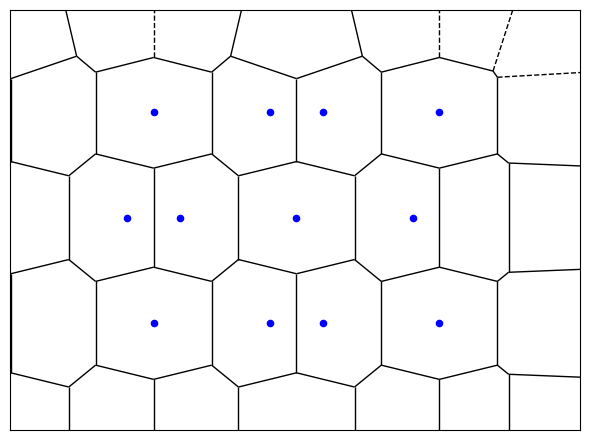

In [12]:
from SimuBox import AnalyzeMode, read_printout, read_density, VoronoiCell
import numpy as np
des = read_density("./Datasets/Voronoi")
pri = read_printout("./Datasets/Voronoi")
des.repair_from_printout(pri)
vc = VoronoiCell.Analyze(density=des, mode=AnalyzeMode.VORONOI, slices=(0, 0))

100%|██████████| 250000/250000 [00:02<00:00, 103531.20it/s]


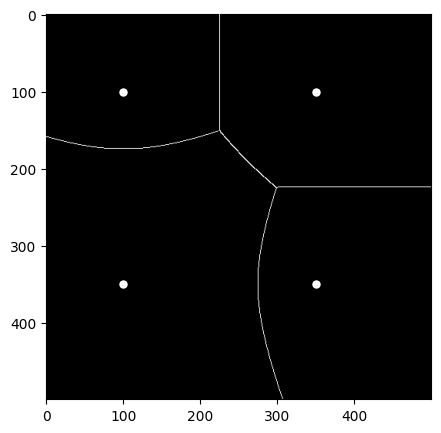

In [2]:
from SimuBox import VoronoiCell, WeightedMode
fig, ax = VoronoiCell.weighted_voronoi_diagrams(
        [[100,350],[100,100],[350,350],[350,100]],
        weights=[1e2,0,0,0],
        plot='vertices',
        method=WeightedMode.additive
)

## 分峰

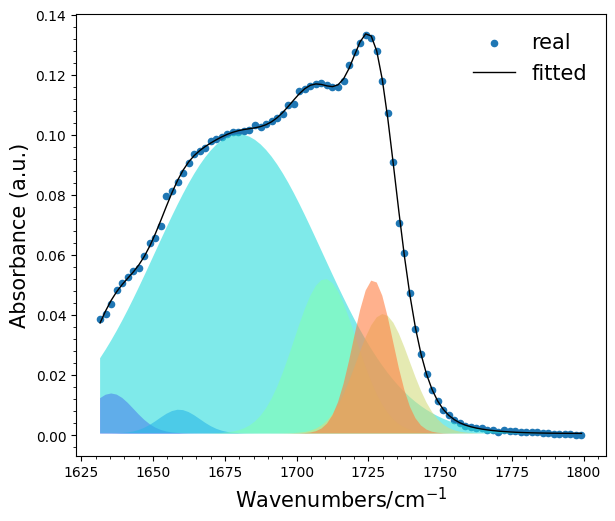

In [14]:
from SimuBox import peak_fit, Peak
import pandas as pd
import numpy as np
from pathlib import Path

peak_folder = Path("./Datasets/Peaks")

peak_location = np.loadtxt(peak_folder / "峰位.txt")
peaks = [Peak(center=i, fix=(False, True, False)) for i in peak_location[0]]
line_before = pd.read_excel(peak_folder / "分峰拟合.xlsx", sheet_name='lineB')
thresh_min = 1630
thresh_max = 1800
line_before = line_before[(line_before["Wavenumber (X)"] > thresh_min) & (line_before["Wavenumber (X)"] < thresh_max)]

x = line_before['Wavenumber (X)']
y = line_before['absorption (Y)']

res = peak_fit(x, y, peaks, scale=(0.99,1.01))

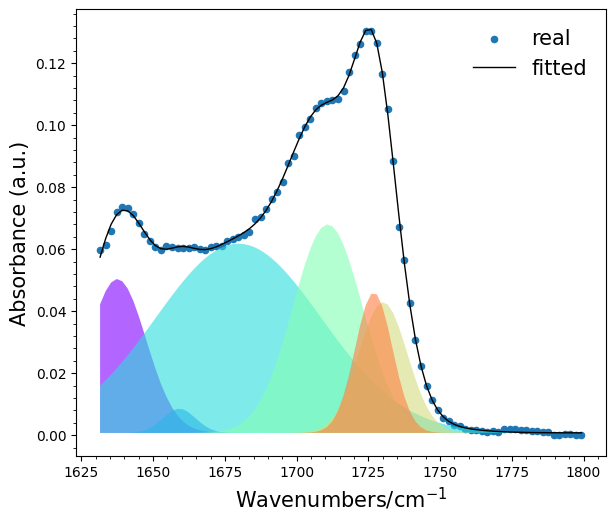

In [15]:
line_after = pd.read_excel(peak_folder / "分峰拟合.xlsx", sheet_name='lineA')
line_after = line_after[(line_after["Wavenumber (X)"] > thresh_min) & (line_after["Wavenumber (X)"] < thresh_max)]
x = line_after['Wavenumber (X)']
y = line_after['absorption (Y)']
res = peak_fit(x, y, peaks=peaks, scale=(0.99,1.01))